In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [48]:
#Copy and paste every filename containing monthly flight data from directory if loop doesnt work
# f = "flightlist_20211201_20211231.csv" 
#Loop through every csv file in directory getting the data we need
for f in os.listdir('csvs'):

    #Read csv
    flightlist = pd.read_csv('csvs/' + f, low_memory=False)
    a_codes = pd.read_csv('airport-codes_csv.csv', low_memory=False)
    # flightlist = flightlist.dropna()

    #drop unneeded columns
    flightlist.drop(columns=["callsign", "number", "icao24", "registration", "typecode", "altitude_1", "altitude_2", "firstseen", "lastseen"], axis=1, inplace=True, index=None)

    #filter airports to selected large airports we find could represent the trend
    airports = ['PHNL', 'KATL', 'KLAX', 'KLAS', 'KORD', 'KDFW', 'KDEN', 'KJFK', 'KSFO', 'KSEA', 'KMCO', 'KLAS', 'KCLT', 'KEWR', 'KPHX', 'KIAH', 'KMIA', 'KBOS', 'KMSP', 'KDTW', 'KFLL', 'KPHL', 'KLGA', 'KBWI', 'KSLC', 'KSAN', 'KIAD', 'KDCA', 'KTPA', 'KMDW']
    flightlist = flightlist[flightlist['destination'].isin(airports)]

    # #merge with airport codes dataset
    # mflights = pd.merge(a_codes, flightlist, how="right", on='destination' )

    # #drop more unnecessary columns inherited from merge
    # mflights.drop(columns=["continent", "iso_country", "elevation_ft", "ident", "iata_code", "local_code", "coordinates"], axis=1, inplace=True, index=None)
    #save to csv using former filename between 11 characters from the first character and -15 characters from the last one.
    flightlist.to_csv((f'{f[11:-15]}.csv'), index=False)
    # mflights

In [49]:
#Create list variables for flights and filenames

flights =[]
names = []

#loop through trimmed csv files
for f in os.listdir('trimmed'):
    print(f)
    #read trimmed csv file 
    tcsv=pd.read_csv('trimmed/' + f)
    #get number of rows per csv file
    totalflights=len(tcsv)
#     temp.drop(columns=["iso_country", "elevation_ft", "ident", "iata_code", "local_code", "coordinates"], axis=1, inplace=True, index=None)
#     temp.to_csv(f, index=False)

    #save figures per csv file to list
    flights.append(totalflights)
    names.append(f[0:-4])
    
    

202011.csv
202106.csv
202008.csv
202105.csv
202003.csv
201901.csv
201909.csv
201903.csv
202102.csv
201912.csv
202001.csv
202104.csv
202107.csv
202111.csv
201904.csv
201910.csv
202002.csv
202009.csv
201911.csv
202112.csv
201902.csv
202005.csv
201907.csv
202101.csv
202007.csv
202109.csv
202010.csv
202012.csv
201908.csv
202006.csv
201906.csv
202004.csv
202110.csv
201905.csv
202108.csv
202103.csv


In [55]:
#create dataframe from lists created from looping though csv files
flights_per_date = pd.DataFrame(

            {'flights': flights,
            "dates": names})

In [56]:
#save dataframe to csv file using new index
flights_per_date = flights_per_date.sort_values(by='dates').reset_index(drop=True)
flights_per_date.to_csv("flights_per_date.csv", index=False)
flights_per_date = pd.read_csv("flights_per_date.csv")
flights_per_date

,flights,dates
0,268136,201901
1,254221,201902
2,276084,201903
3,269720,201904
4,290574,201905
5,293107,201906
6,337746,201907
7,374793,201908
8,327193,201909
9,396700,201910


In [57]:
#convert filenames to datetime
flights_per_date['datetime_dates'] = pd.to_datetime(flights_per_date['dates'], format='%Y%m')

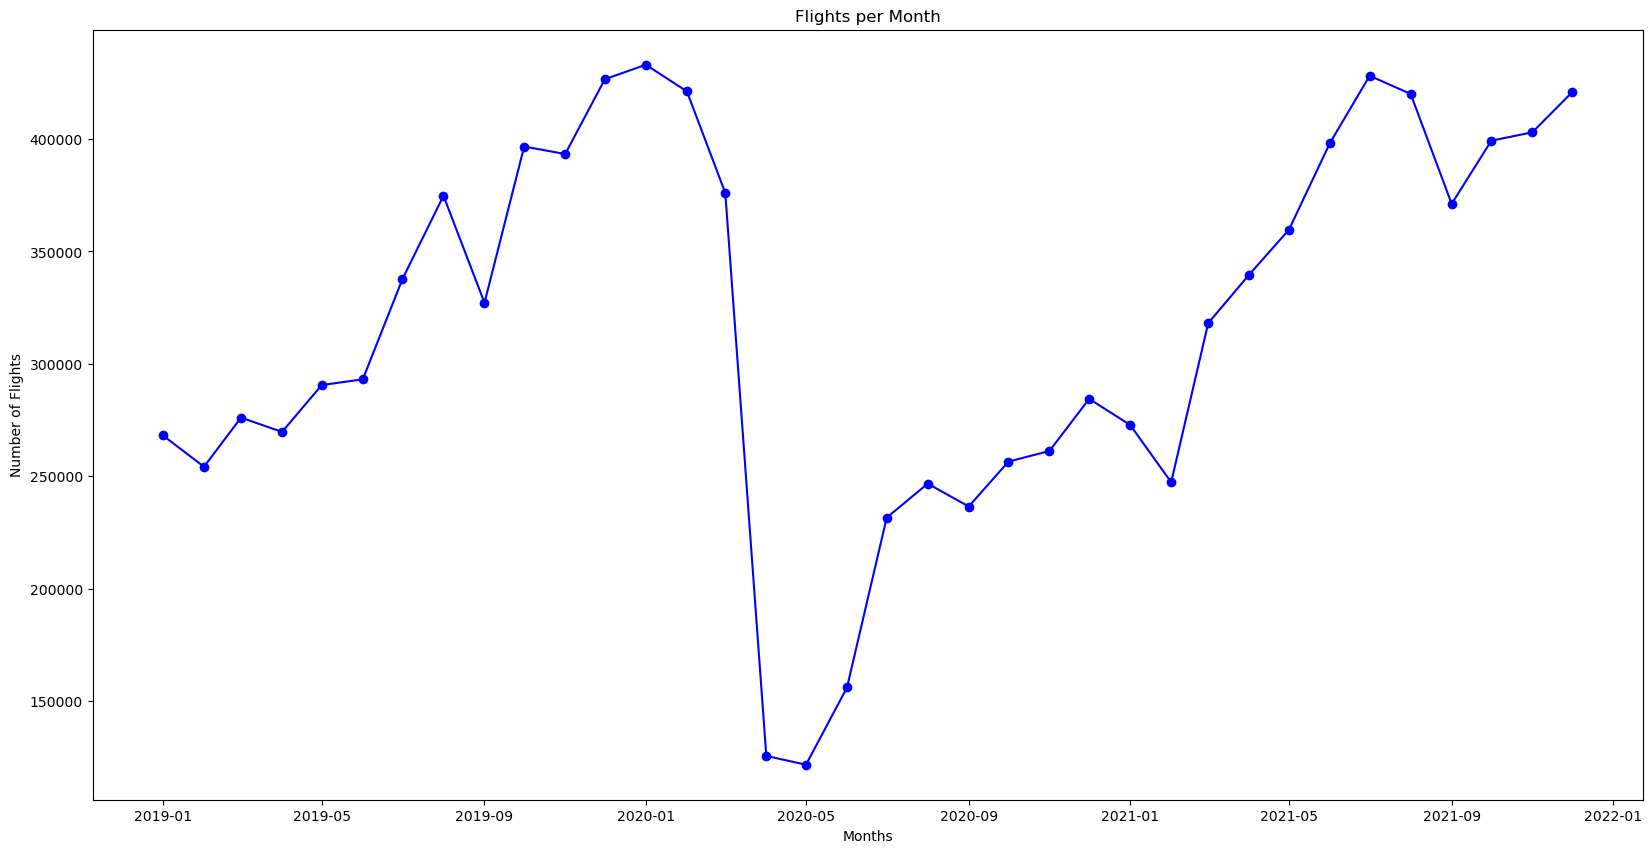

In [54]:
#plot flights per month vs number of flights
plt.figure(figsize=(20,10))

plt.plot(flights_per_date["datetime_dates"],flights_per_date["flights"],marker ='o', color='blue')
plt.ylabel('Number of Flights')
plt.xlabel('Months')
plt.title('Flights per Month')
plt.show()